<a href="https://colab.research.google.com/github/lucacontalbo/DecisionTreeClassifier/blob/main/DecisionTreeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision tree per classificazione

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Decision tree per classificazione
- Classification-tree
    - Sequenza di domande if-else su features individuali.
    - **Obiettivo**: stabilire la specie dei fiori.
    - Riesce a catturare relazioni non lineari tra features e attributo target (specie).
    - Non richiede standardizzazione delle features

- Decision Regions
    - Decision region: area nella "feature space" dove ogni istanza viene assegnata ad una particolare classe target.
    - Decision Boundary: curva che separa diverse decision regions
![decision region](https://github.com/goodboychan/chans_jupyter/blob/master/_notebooks/image/decision_boundary.png?raw=1)

### Allena il tuo albero decisionale

In questo esercizio lavorerai con il dataset Iris. Dovrai predirre la specie dei fiori in base ad alcune loro caratteristiche, come il ```sepal length```, ```sepal width```, ```petal width```, ```petal length```.  
Le specie presenti nel dataset sono l'```Iris Setosa```, l'```Iris Virginica``` e l'```Iris Versicolor```.

### Preprocessing

In [3]:
wbc = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv')
wbc.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


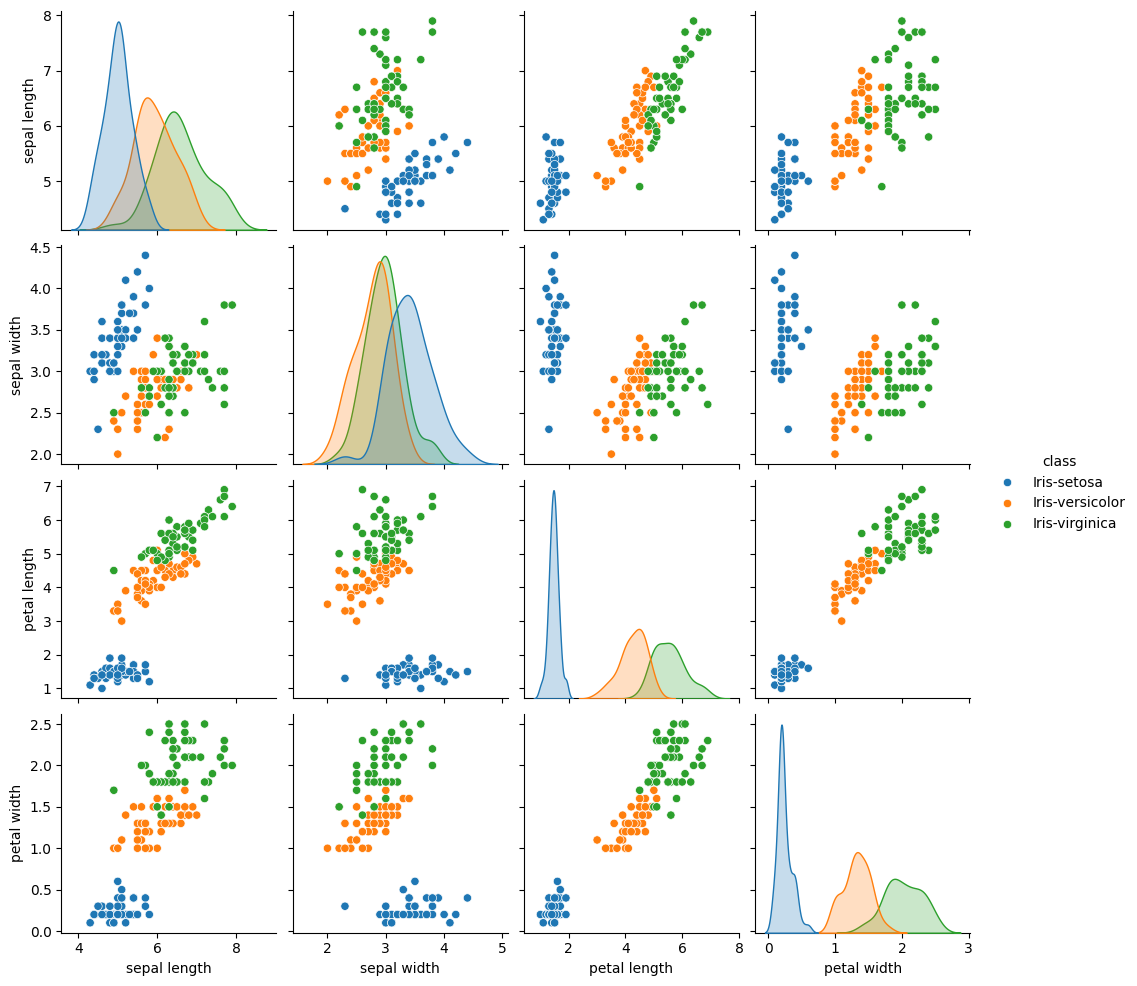

In [4]:
sns.pairplot(wbc, hue="class")

In [5]:
X = wbc[['sepal length', 'petal length']]
y = wbc['class']
y_mapped = y.map({'Iris-setosa':2, 'Iris-versicolor':1, 'Iris-virginica': 0})

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state=1)

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Instanziamo un DecisionTreeClassifier 'dt' con maximum depth di 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Allena il DecisionTreeClassifier sul dataset di training
dt.fit(X_train, y_train)

# Fai la predizione dei target sul test set
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[2 1 1 2 0]


### Valuta l'albero decisionale

Per ottenere la qualità del nostro modello, useremo l'accuracy come metrica, che corrisponde alla percentuale di risposte corrette date dal sistema

In [8]:
from sklearn.metrics import accuracy_score

# Ottieni la predizione dei target sul dataset di test
y_pred = dt.predict(X_test)

# Calcola l'accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.97


### Logistic regression vs classification tree
Un albero decisionale divide lo "spazio delle features" in aree rettangolari. Invece, un modello lineare produce solo delle "decision boundary" lineari, dividendo il feature space tramite rette

#### Helper function

In [9]:
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained
    in the 2D dataset (X,y) along with the decision
    regions of two trained classification models contained in the
    list 'models'.

    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers

    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


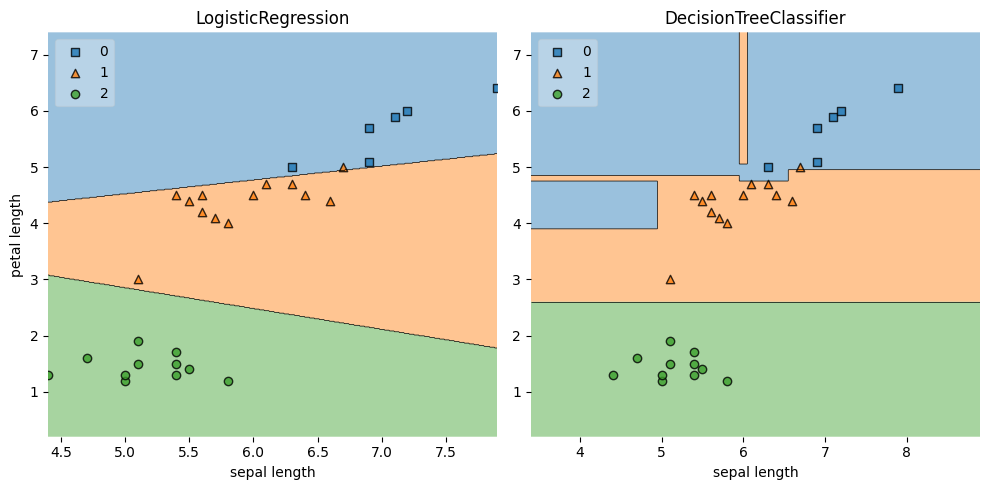

In [10]:
from sklearn.linear_model import LogisticRegression

# Instanziamo logreg per la Logistic Regression
logreg = LogisticRegression(random_state=1)

# Allena logreg sul training set
logreg.fit(X_train, y_train)

# Definisci una lista chiamata clfs contenente i due classificatori logreg e dt
clfs = [logreg, dt]

# Visualizza le "decision regions" dei due classificatori
plot_labeled_decision_regions(X_test, y_test, clfs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


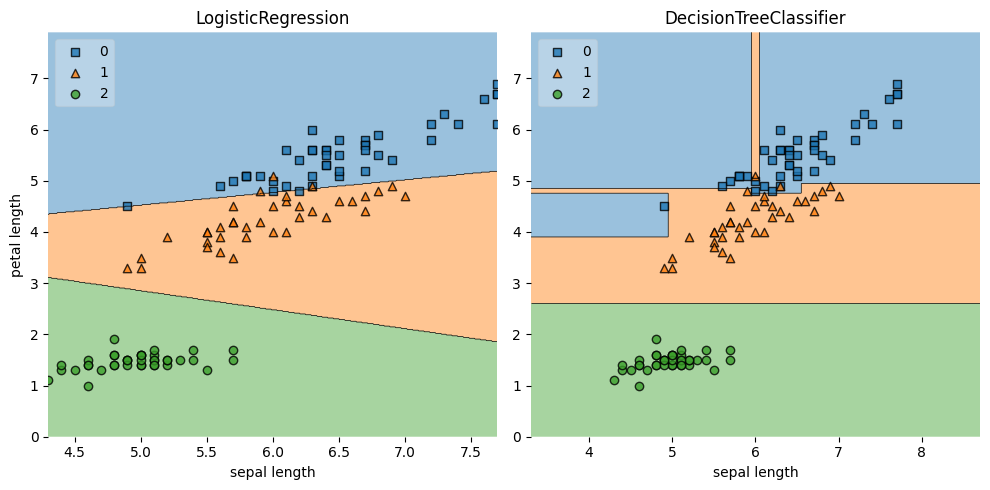

In [11]:
plot_labeled_decision_regions(X_train, y_train, clfs)

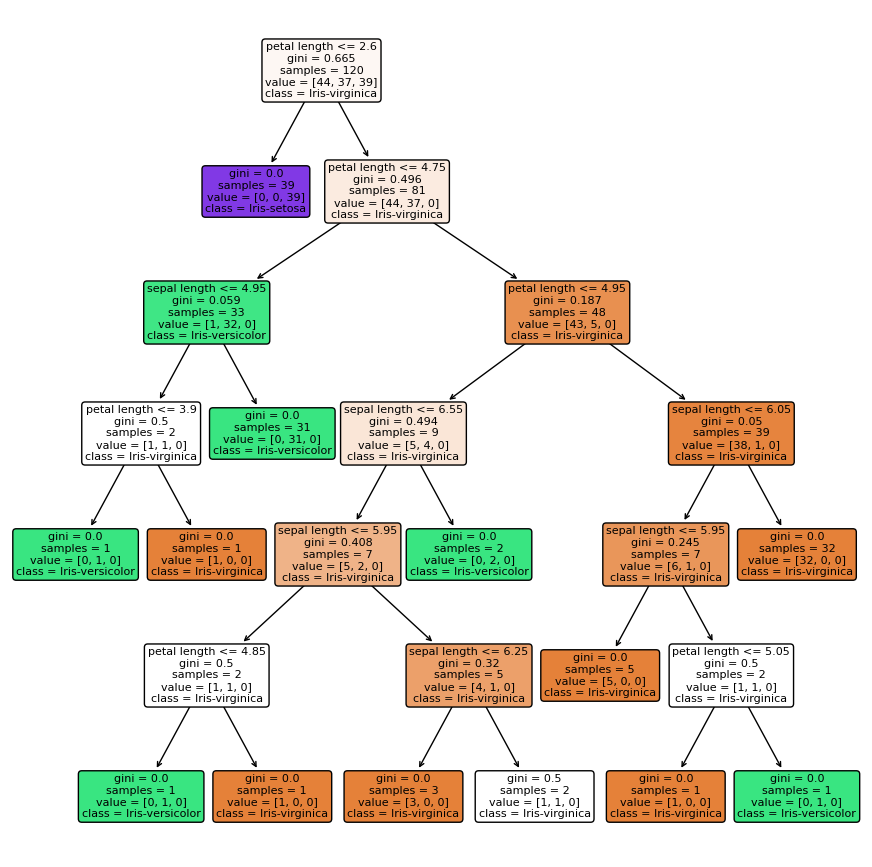

In [12]:
from sklearn.tree import plot_tree

plt.figure(figsize=(11,11))
plot_tree(dt, feature_names=["sepal length", "petal length"], class_names=y.unique()[::-1], filled=True, rounded=True, fontsize=8)
plt.show()

### Your turn!

In [ ]:
wbc = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv').drop(["island","sex"], axis="columns")
wbc = wbc.dropna()
wbc.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
